In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Lendo dados e tratando valores nulos

In [122]:
dados_treino = pd.read_csv('train.csv')
print(dados_treino.columns)
# Valores nulos na idade recebem a média das idades
dados_treino.fillna(value=dados_treino['Age'].mean(), inplace=True)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Construindo Gráficos para Sexo

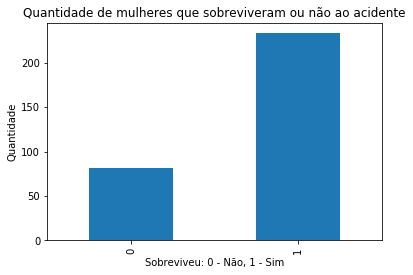

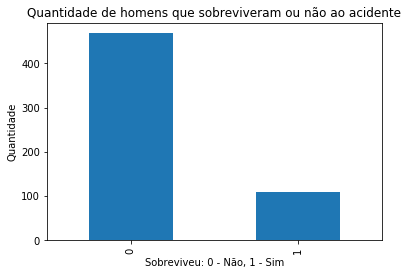

In [68]:
dados_homens = dados_treino[dados_treino['Sex'] == 'male']
dados_mulheres = dados_treino[dados_treino['Sex'] == 'female']
dados_homens_sobreviventes = dados_homens.groupby('Survived')
dados_mulheres_sobreviventes = dados_mulheres.groupby('Survived')

dados_mulheres_sobreviventes['PassengerId'].count().plot(kind='bar')
plt.title('Quantidade de mulheres que sobreviveram ou não ao acidente')
plt.ylabel('Quantidade')
plt.xlabel('Sobreviveu: 0 - Não, 1 - Sim')
plt.show()

dados_homens_sobreviventes['PassengerId'].count().plot(kind='bar')
plt.title('Quantidade de homens que sobreviveram ou não ao acidente')
plt.ylabel('Quantidade')
plt.xlabel('Sobreviveu: 0 - Não, 1 - Sim')
plt.show()

# Construindo Gráficos ára Idade

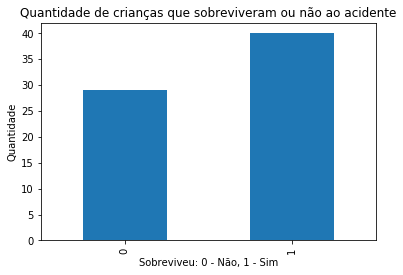

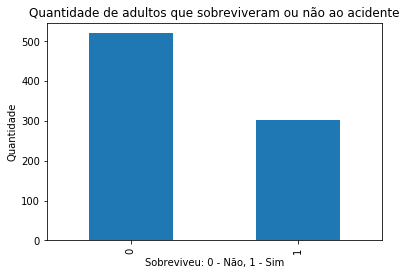

In [69]:
dados_adultos = dados_treino[dados_treino['Age'] > 12]
dados_criancas = dados_treino[dados_treino['Age'] <= 12]
dados_adultos_sobreviventes = dados_adultos.groupby('Survived')
dados_criancas_sobreviventes = dados_criancas.groupby('Survived')

dados_criancas_sobreviventes['PassengerId'].count().plot(kind='bar')
plt.title('Quantidade de crianças que sobreviveram ou não ao acidente')
plt.ylabel('Quantidade')
plt.xlabel('Sobreviveu: 0 - Não, 1 - Sim')
plt.show()

dados_adultos_sobreviventes['PassengerId'].count().plot(kind='bar')
plt.title('Quantidade de adultos que sobreviveram ou não ao acidente')
plt.ylabel('Quantidade')
plt.xlabel('Sobreviveu: 0 - Não, 1 - Sim')
plt.show()

# Construindo Gráficos para Classe

In [70]:
dados_classe1 = dados_treino[dados_treino['Pclass'] == 1]
dados_classe2 = dados_treino[dados_treino['Pclass'] == 2]
dados_classe3 = dados_treino[dados_treino['Pclass'] == 3]
dados_classe1_sobreviventes = dados_classe1.groupby('Survived')
dados_classe2_sobreviventes = dados_classe2.groupby('Survived')
dados_classe3_sobreviventes = dados_classe3.groupby('Survived')


dados_classe1_sobreviventes['PassengerId'].count().plot(kind='bar')
plt.title('Quantidade de passageiros da primeira classe que sobreviveram ou não ao acidente')
plt.ylabel('Quantidade')
plt.xlabel('Sobreviveu: 0 - Não, 1 - Sim')
plt.show()

dados_classe2_sobreviventes['PassengerId'].count().plot(kind='bar')
plt.title('Quantidade de passageiros da segunda classe que sobreviveram ou não ao acidente')
plt.ylabel('Quantidade')
plt.xlabel('Sobreviveu: 0 - Não, 1 - Sim')
plt.show()

dados_classe3_sobreviventes['PassengerId'].count().plot(kind='bar')
plt.title('Quantidade de passageiros da terceira classe que sobreviveram ou não ao acidente')
plt.ylabel('Quantidade')
plt.xlabel('Sobreviveu: 0 - Não, 1 - Sim')
plt.show()

# Tarnsformando Dados

In [123]:
dados_treino['Sex'] = dados_treino['Sex'].map({'male':0,'female':1})

def encode_units(x):
    if (x <= 12.0):
        return 1
    else:
        return 0

dados = pd.DataFrame(dados_treino['Age'])
dados = dados.applymap(encode_units)
dados_treino['Age'] = dados

In [125]:
def encode_units2(x):
    if (x == 3):
        return 1
    else:
        return 0

dados = pd.DataFrame(dados_treino['Pclass'])
dados = dados.applymap(encode_units2)
dados_treino['Pclass'] = dados

# Dividindo em Treino, Teste e Validação

In [143]:
caracteristicas_train,caracteristicas_test,rotulos_train,rotulos_test = train_test_split(dados_treino[['Sex', 'Age', 'Pclass']],
                                                             dados_treino['Survived'],test_size=0.2, random_state=0)

## Fazendo validação cruzada

In [262]:
#Utilizando o algoritmo SVM
algoritmo_svm = SVC(kernel='sigmoid',gamma='scale', C=1.0, coef0=1.0,shrinking=True, probability=False, tol=0.001, 
                    max_iter=-1, decision_function_shape='ovr')
resultados = cross_val_predict(algoritmo_svm, caracteristicas_train, rotulos_train, cv=10)
acuracia = metrics.accuracy_score(rotulos_train, resultados)
print("Acurácia = {0}%".format(acuracia*100))

Acurácia = 80.6179775280899%


## Fazendo Treino e Teste

In [271]:
algoritmo_svm.fit(caracteristicas_train, rotulos_train)
print("Acurácia = {0}%".format(100*np.sum(algoritmo_svm.predict(caracteristicas_test) == rotulos_test)/len(rotulos_test)))
print("algoritmo SVM (Precisão, Revogação, Fscore)")
precision_recall_fscore_support(rotulos_test, algoritmo_svm.predict(caracteristicas_test),average=None)

Acurácia = 79.32960893854748%
algoritmo SVM (Precisão, Revogação, Fscore)


(array([0.82882883, 0.73529412]),
 array([0.83636364, 0.72463768]),
 array([0.83257919, 0.72992701]),
 array([110,  69], dtype=int64))

# Realizando predição para submissão

In [268]:
dados_teste = pd.read_csv('test.csv')
# Valores nulos na idade recebem a média das idades
dados_teste.fillna(value=dados_teste['Age'].mean(), inplace=True)

## Transformando Dados

In [269]:
dados_teste['Sex'] = dados_teste['Sex'].map({'male':0,'female':1})

dados = pd.DataFrame(dados_teste['Age'])
dados = dados.applymap(encode_units)
dados_teste['Age'] = dados

In [270]:
dados = pd.DataFrame(dados_teste['Pclass'])
dados = dados.applymap(encode_units2)
dados_teste['Pclass'] = dados

## Treinando e fazendo predição

In [273]:
algoritmo_svm.fit(dados_treino[['Age', 'Sex', 'Pclass']], dados_treino['Survived'])
resultados_submissao = {}
resultados_submissao['PassengerId'] = list(dados_teste['PassengerId'])
resultados_submissao['Survived'] = algoritmo_svm.predict(dados_teste[['Age', 'Sex', 'Pclass']])

In [274]:
df_resultados_submissao = pd.DataFrame(resultados_submissao, columns= ['PassengerId', 'Survived'])
df_resultados_submissao.to_csv('resultados_submissao.csv', index = None, header=True)